# Aplicación de Analytics en el Fútbol Moderno 

##### Case study #4: Sergio Peña Eredivisie 20-21 Stats

Objetivo principal: Analizar el rendimiento de Sergio Peña en la temporada 2020-2021 en su rol como mediocentro ofensivo en el FC Emmen de los Países Bajos.

## Descriptive Analytics

Definición: La interpretación de data histórica para entender de una manera analítica el rendimiento de un determinado caso, en este caso el futbolista o equipo de fútbol.


### Las Estadísticas Superficiales

Breve Explicación: Me refiero como superficiales a aquellas estadísticas que suelen estar en el ojo público y son las más generales y difundidas por los medios de comunicación. Algunas de estas incluyen los goles, asistencias, remates, posesión, etc. En mi opinión estas estadísticas por sí solas no te explican el contenido de un partido individualmente y carecen de sustento estadístico como para considerarlas como las más importantes.

Ejercicio/Dinámica: Importaremos data general disponible en el software Wyscout para luego visualizar los números de Peña en cuanto a goles y asistencias. 

In [2]:
# Import libraries and packages
import pandas as pd 
import numpy as np

# load dataset into the environment
cam_eredivisie = pd.read_csv("BestCAMEredivise.csv")
pd.options.display.max_columns

# We are going to Analyze the TOP 10 Central Attacking Midfielders according to Wyscout Software
cam_eredivisie_df = cam_eredivisie.iloc[1:11]
cam_eredivisie_df

,Player,Team,Position,Age,Matches played,Minutes played,Goals,xG,Assists,xA,...,"Goal conversion, %",Passes per 90,"Accurate passes, %",Forward passes per 90,xA per 90,Key passes per 90,"Accurate through passes, %",Progressive passes per 90,"Direct free kicks on target, %","Penalty conversion, %"
1,D. Klaassen,Ajax,"RDMF, RCMF, AMF",28,29,2321,12,11.61,3,3.21,...,27.907,45.79,87.13,12.83,0.12,0.39,40.91,6.17,0.00,50
2,S. van de Streek,Utrecht,"AMF, CF",28,34,2800,11,10.91,4,2.45,...,14.865,22.95,73.39,7.17,0.08,0.26,33.33,3.66,0.00,50
3,A. El Messaoudi,Gaziantep,"AMF, RCMF",26,29,2457,8,5.39,0,1.31,...,16.327,24.43,80.06,7.40,0.05,0.15,41.18,3.41,0.00,0
4,A. Guðmundsson,Genoa,"AMF, CF, RAMF",24,26,2043,7,10.81,3,4.16,...,12.727,31.89,81.91,8.50,0.18,0.84,50.00,3.66,0.00,100
5,C. Stengs,Nice,"RAMF, AMF, RWF",23,30,2759,7,6.80,5,7.33,...,11.475,38.26,78.43,11.58,0.24,0.72,51.09,6.52,0.00,0
6,O. Tannane,Göztepe,"AMF, CF, RCMF",28,29,2531,7,8.70,9,9.56,...,5.556,43.45,75.61,16.25,0.34,0.75,20.45,9.39,16.67,100
7,S. Peña,Malmö FF,AMF,26,32,2954,6,6.71,2,5.29,...,10.909,61.42,83.43,14.84,0.16,0.55,34.72,8.68,25.00,80
8,Q. Promes,Spartak Moskva,"AMF, LAMF, CF",30,19,1083,6,8.30,0,1.59,...,11.765,45.04,88.19,9.97,0.13,0.50,71.43,3.91,0.00,100
9,Z. Labyad,Ajax,"AMF, CF, RCMF",28,22,1021,5,4.80,6,2.45,...,12.821,35.61,80.20,7.67,0.22,0.79,21.43,5.02,60.00,0
10,M. Götze,PSV,"RW, LW, AMF",30,18,1458,5,5.16,5,2.69,...,33.333,66.60,85.63,15.68,0.17,0.80,34.29,8.09,0.00,0


In [3]:
cam_eredivisie_df.groupby(by=["Player"])[["Goals", "Assists"]].mean().sort_values(by=["Goals"], ascending=False)

,Goals,Assists
Player,,
D. Klaassen,12.0,3.0
S. van de Streek,11.0,4.0
A. El Messaoudi,8.0,0.0
A. Guðmundsson,7.0,3.0
C. Stengs,7.0,5.0
O. Tannane,7.0,9.0
Q. Promes,6.0,0.0
S. Peña,6.0,2.0
M. Götze,5.0,5.0


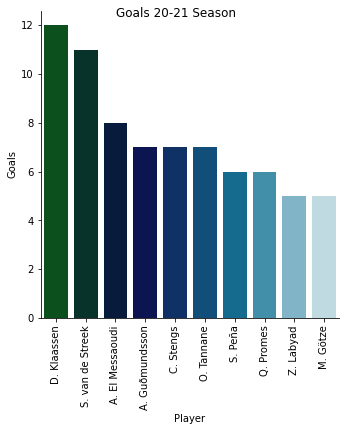

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

a = sns.catplot(data=cam_eredivisie_df, x="Player", y="Goals", kind="bar", palette="ocean")
a.set_xticklabels(rotation=90)
a.fig.suptitle('Goals 20-21 Season')
plt.show()

### Las Estadísticas "Profundas" - In Depth Statistics

Breve Explicación: A diferencia de las estadísticas superficiales, que son los que normalmente se comunican en prensa, estas estadísticas nos permiten entender de manera más analítica los aspectos del juego del jugador, con métricas específicas que comunican acciones del juego que normalmente pasan desapercibidas para el espectador promedio.

Dinámica: Sergio Peña es catalogado como un jugador de mucha calidad técnica individual, y a veces subestimado por su habilidad en otras áreas. A continuación se hará un breve análisis descriptivo de su capacidad e implicación defensiva durante la temporada.

In [5]:
cam_eredivisie_df.groupby(by=["Player"])[["Successful defensive actions per 90", "Defensive duels per 90", "Defensive duels won, %"]].mean().sort_values(by=["Successful defensive actions per 90"], ascending=False)

,Successful defensive actions per 90,Defensive duels per 90,"Defensive duels won, %"
Player,,,
M. Götze,9.01,6.91,64.29
S. Peña,7.25,6.43,60.66
D. Klaassen,6.71,5.43,52.14
A. El Messaoudi,6.70,6.70,55.74
S. van de Streek,6.11,5.75,54.19
C. Stengs,5.15,5.15,54.43
A. Guðmundsson,4.93,4.98,57.52
O. Tannane,4.62,5.69,48.75
Q. Promes,3.57,2.49,66.67


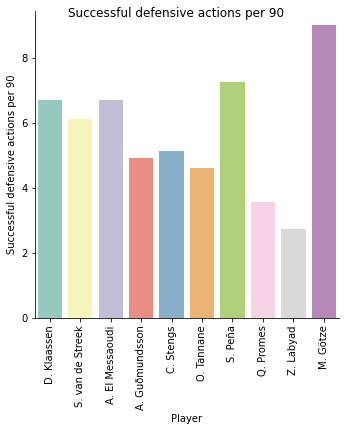

In [6]:
a = sns.catplot(data=cam_eredivisie_df, x="Player", y="Successful defensive actions per 90", kind="bar", palette="Set3")
a.set_xticklabels(rotation=90)
a.fig.suptitle('Successful defensive actions per 90')
plt.show()

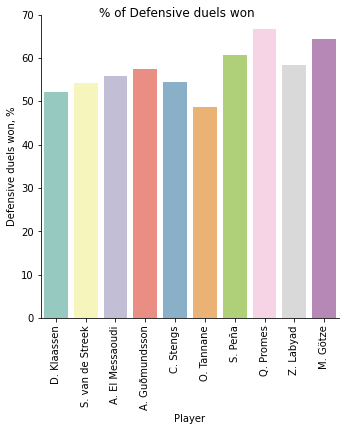

In [7]:
a = sns.catplot(data=cam_eredivisie_df, x="Player", y="Defensive duels won, %", kind="bar", palette="Set3")
a.set_xticklabels(rotation=90)
a.fig.suptitle('% of Defensive duels won')
plt.show()

### Interpretación

Peña es de los mediocentros ofensivos con más acciones defensivas exitosas en la Eredivisie (por 90 minutos), solo superado por Mario Gotze. Esto habla de una implicación defensiva importante a pesar de la zona en la que normalmente el jugador fluctúa y los roles asociados al tradicional número 10. Además, no es solo que el jugador se implique más en defensa, sino que también tiene un alto % de efectividad (60.66%) a la hora de ejercer una presión o enfrentarse 1 v 1 ante un rival. 

Quizás estos números que reflejan un alto compromiso en la faceta defensiva sea uno de los factores por lo cual Ricardo Gareca apueste tanto por él en esa función de volante mixto al costado de Yotún y Tapia en la selección nacional.

## Las Estadísticas AI - Adquiridas por modelos avanzados de Machine/Deep Learning & Inteligencia Artificial

* **Expected Goals (xG)** - Modelo estadístico creado con el objetivo de obtener un reflejo más preciso de lo que realmente sucedió durante un partido (o temporada) en relación con la calidad de las oportunidades y disparos que cada equipo o jugador fue capaz de generar. A diferencia de las estadísticas tradicionales (total de goles marcados, total de tiros, tiros a puerta, etc.), el xG se centra en la calidad de los remates en lugar de la cantidad, y asigna una probabilidad (basada en datos históricos) para cada tiro realizado. Cada oportunidad de gol contribuirá a un sistema de puntos. Por ejemplo, un tiro penal supone un 76% de probabilidad de ser anotado, es decir, 0.76 puntos que se sumarán a los demás valores de xG de otros tiros realizados por el mismo jugador. 

* **Expected Assists (xA)** - Modelo estadístico creado con la finalidad de medir el peligro de un pase efectuado por determinado jugador que termina en un remate de un compañero, asignándole una probabilidad de que la oportunidad creada termine en gol (también basada en datos históricos). La métrica también mide la calidad de los pases teniendo en cuenta la calidad del finalizador (aquel que efectúa el disparo tras recibir el pase). 

* **Expected Threat (xT)** - Modelo estadístico que divide el campo en una cuadrícula, con cada celda asignada a una probabilidad de que una acción iniciada allí resulte en un gol en las próximas N acciones. El enfoque nos permite valorar no solo las partes del campo desde las que es más probable marcar directamente, sino también aquellas desde las que es más probable que se produzca una asistencia. Las acciones que mueven el balón, como los pases y los regates (también denominados acarreos del balón), pueden valorarse únicamente en función de sus puntos de inicio y finalización, tomando la diferencia en xT entre la celda inicial y final.

* **Expected Points (xPTS)** - Modelo estadístico que mide la cantidad de puntos que un equipo podría haber esperado obtener de un juego, en función de las oportunidades de gol (xG) que crearon y concedieron en ese juego. Es una puntuación cumulativa que se puede usar como referencia al final de la temporada para ver que equipos merecieron quizá más o menos puntos del que tuvieron.

* **Los modelos se siguen desarrollando y serán parte fundamental del futuro del fútbol, aquellos que se adapten al cambio tendrán una ventaja competitiva importante.** 

### Analysis Expected Assists (xA) - Sergio Peña

In [8]:
cam_eredivisie_df.groupby(by=["Player"])[["Assists", "xA"]].mean().sort_values(by=["xA"], ascending=False)

,Assists,xA
Player,,
O. Tannane,9.0,9.56
C. Stengs,5.0,7.33
S. Peña,2.0,5.29
A. Guðmundsson,3.0,4.16
D. Klaassen,3.0,3.21
M. Götze,5.0,2.69
S. van de Streek,4.0,2.45
Z. Labyad,6.0,2.45
Q. Promes,0.0,1.59


In [9]:
pena_xA = 5.29
xA_underperformance = 2.0 - 5.29
cam_eredivisie["xA"].mean()
increase = (pena_xA - cam_eredivisie["xA"].mean()) / cam_eredivisie["xA"].mean() * 100
increase1 = (pena_xA - cam_eredivisie_df["xA"].mean()) / cam_eredivisie_df["xA"].mean() * 100

print("Peña xA performance: " + str(xA_underperformance))
print("xA promedio en la Eredivisie (Mediocentro ofensivo): " + str(cam_eredivisie["xA"].mean()))
print("xA promedio en la Eredivisie (TOP 10 - Mediocentro ofensivo): " + str(cam_eredivisie_df["xA"].mean()))
print("Diferencia del xA (Sergio Peña) en relación al promedio de la liga: " + str(pena_xA-cam_eredivisie["xA"].mean()))
print("Incremento en porcentage xA de Peña en relación al promedio de la Eredivisie (Mediocentro ofensivo): " + str(round(increase, 2)) + "%")
print("Incremento en porcentage xA de Peña en relación al promedio de la Eredivisie (TOP 10 - Mediocentro ofensivo): " + str(round(increase1, 2)) + "%")

Peña xA performance: -3.29
xA promedio en la Eredivisie (Mediocentro ofensivo): 1.8779166666666667
xA promedio en la Eredivisie (TOP 10 - Mediocentro ofensivo): 4.0040000000000004
Diferencia del xA (Sergio Peña) en relación al promedio de la liga: 3.4120833333333334
Incremento en porcentage xA de Peña en relación al promedio de la Eredivisie (Mediocentro ofensivo): 181.7%
Incremento en porcentage xA de Peña en relación al promedio de la Eredivisie (TOP 10 - Mediocentro ofensivo): 32.12%


### Interpretación: 

Si nos fijamos solo en los stats superficiales, durante la temporada 2020-2021 Sergio Peña ha logrado asistir a sus compañeros solamente 2 veces, números relativamente bajos considerando la posición y rol del juego que desempeña un mediocentro ofensivo. De filtrar en base a Asistencias totales, Peña se posicionaría en la parte baja del ranking. 

Sin embargo, de filtrar en base a Expected Assists Peña escala a puestos altos solo por debajo de Tannane y Stengs. Sin entrar en tecnicismos, Peña ha generado suficientes situaciones de gol como para llevar un total de Asistencias de 5.29, pero tuvo un "under-performance" de -3.29. 

¿Qué quiere decir esto?

* Peña es víctima de la falta de efectividad de sus compañeros.
* Si todos los pases efectuados por Peña (que acabaron en oportunidad de gol) hubiesen sido rematados por el jugador promedio, Peña tendría 5.29 asistencias. En base a probabilidad y estadística.

##### La importancia de entender estos modelos avanzados: 

A diferencia de un "under-performance" en el xG, que es sinónimo de falta de efectividad de cara al gol, un performance negativo en xA se interpreta como una falta de efectividad de los asistidos. A la hora de realizar un análisis del performance, es necesario centrarse a los modelos estadísticos avanzados, ya que son métricas que nos explican de manera más realista el desarrollo de un partido o rendimiento de un jugador. En este caso específico, Peña podría ser incorrectamente catalogado como un mediocentro sin capacidad de asistir en los metros finales (en base a Asistencias Totales), sin embargo el modelo xA nos explica que esta afirmación es falsa, que de hecho Peña es de los mejores de la liga en esta faceta del juego.

## Predictive Analytics

Definición: El uso de estadística y técnicas de modelamiento para determinar rendimiento futuro en base a la actual e histórica data disponible.

Dinámica: Utilizaremos el Web-based software Soccerment-Analytics (https://analytics.soccerment.com/en/stats/sergio-pena-1995-09-28?season=2020) que contiene una gráfica de las facetas del juego de Peña en relación al del Mediocentro Ofensivo promedio. De esta manera podemos visualizar las fortalezas y debilidades del jugador, las cuáles según el software incluyen el Dribbling, la Visión de juego, y el pase.

Metodología: Filtraremos la data en base a los aspectos del juego en Wyscout Software, similar a la dinámica anterior, con la diferencia de que tendremos un set de datos especializado para cada aspecto del juego, en este caso Dribbling y Passing. Exportaremos la data en formato XCL, para luego aplicar un poco de data cleaning y posteriormente importar la data en un archivo CSV en el Jupyter Environment para el análisis.

### Faceta del juego 1: Dribbling

Data Gathering - Software: WyScout. 

In [10]:
# import dataset
dribbling = pd.read_csv("AttackingAspectEredevisie.csv")
print("Estadísticas de Sergio Peña. Aspecto del juego: dribbling")
dribbling.iloc[15, 25:29]

Estadísticas de Sergio Peña. Aspecto del juego: dribbling


Dribbles per 90            3.44
Successful dribbles, %    55.75
Offensive duels per 90    11.61
Offensive duels won, %    37.01
Name: 15, dtype: object

In [11]:
list_loop = ["Dribbles per 90", "Successful dribbles, %", "Offensive duels per 90", "Offensive duels won, %"]
mean_list = []
counter = 0

while counter < len(list_loop):
    a = dribbling[list_loop[counter]].mean()
    mean_list.append(a)
    counter += 1
    
print("Estadísticas promedio de Eredivisie - Mediocentro ofensivos. Aspecto del juego: Dribbling")
print("Dribbles por 90 min:", round(mean_list[0],3))
print("Dribbles Exitosos: " + str(round(mean_list[1],2)) + "%")
print("Duelos ofensivos ganados por 90 min:", round(mean_list[2],3))
print("Duelos ofensivos ganados: " + str(round(mean_list[3],2)) + "%")

Estadísticas promedio de Eredivisie - Mediocentro ofensivos. Aspecto del juego: Dribbling
Dribbles por 90 min: 3.671
Dribbles Exitosos: 48.65%
Duelos ofensivos ganados por 90 min: 9.243
Duelos ofensivos ganados: 39.1%


#### Comentario: 

En cuánto a Dribbling, Peña tiene números por encima al del Mediocentro Ofensivo promedio en la Eredivisie, sobretodo en cuánto a dribbles exitosos y duelos ofensivos ganados por 90 minutos. 

### Relación entre Dribbling y total xG
###### Data extraída de La Liga Santander temporada (21-22). Fuentes: Statsbomb, FBREF.com, Understat.com

In [12]:
laliga_df = pd.read_csv("LaLigaDataset_U.csv") 
laliga_df.head()

laliga_corr = laliga_df.corr()['xG'].sort_values() # Pearson Correlation
laliga_corr = pd.read_csv("variable_correlation.csv")
laliga_corr.loc[laliga_corr['Unnamed: 0'] == "Drib_Att"]

,Unnamed: 0,xG
12,Drib_Att,0.646181


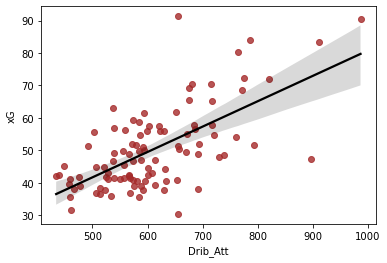

In [13]:
a = sns.regplot(data=laliga_df, x = "Drib_Att", y = "xG", scatter_kws={"color": "brown"}, line_kws={"color": "black"})
plt.show()

#### Interpretación

**Pearson Correlation**: Hay una correlación positiva de 0.6461 (considerada como Moderadamente fuerte) entre los dribbles intentados por equipo y el total de xG durante la temporada. Esto no significa que un mayor puntaje de xG sea causado por un mayor número de dribbles efectuados por equipo, sino que nos hace visualizar la relación entre las variables. Los equipos que suelen tener mayor xG final, normalemente también suelen estar en los puestos altos de la tabla, lo que significa que predominantemente suelen dominar sus partidos, y que entre otras cosas tienen mejores oportunidades de 1 v 1 para que los dribbles sean efectuados. Sin embargo, la relación entre dribles efectuados y las oportunidades de gol creadas pueden ser usadas para desarrollo de estrategias, fichaje de un jugador, o activos importantes en una fase de negociación (como podremos observar en la parte final del estudio).

### Faceta del juego 2: Passing



In [14]:
# import dataset
passing = pd.read_csv("camPossession.csv")
passing = passing.iloc[1:18]
passing.columns
passing.groupby(by=["Player"])[['Passes per 90', 'Accurate passes, %', 'Forward passes per 90', 'Smart passes per 90', 'Key passes per 90', 
                                'Passes to final third per 90', 'Through passes per 90', 'Progressive passes per 90' ]].mean().sort_values(by=["Passes per 90"], ascending=False)

,Passes per 90,"Accurate passes, %",Forward passes per 90,Smart passes per 90,Key passes per 90,Passes to final third per 90,Through passes per 90,Progressive passes per 90
Player,,,,,,,,
M. Götze,66.60,85.63,15.68,2.28,0.80,6.05,2.16,8.09
S. Peña,61.42,83.43,14.84,1.65,0.55,9.44,2.19,8.68
M. Kudus,57.18,91.52,11.87,1.24,0.21,5.26,1.44,6.19
O. Kökçü,53.36,86.36,15.00,1.13,0.49,7.57,1.77,7.48
Q. Promes,45.04,88.19,9.97,0.91,0.50,3.66,0.58,3.91
João Carlos,40.19,82.03,10.65,1.30,0.28,5.00,0.93,5.00
C. Stengs,38.26,78.43,11.58,3.10,0.72,5.35,3.00,6.52
Z. Labyad,35.61,80.20,7.67,1.50,0.79,3.97,1.23,5.02
S. Gustafson,34.83,83.04,11.10,1.08,0.31,6.01,1.80,5.39


#### Comentarios: 

A través de la tabla podemos visualizar las distintas métricas relacionadas a la habilidad de efectuar pases de los distintos mediocentros ofensivos de la Eredivisie 20-21. Sergio Peña destaca en la mayoría de estas, en el que lidera completamente el ranking en 2 de ellas: 

* **Progressive Passes per 90 (Pases Progresivos por 90 minutos)**: Cuantifica la cantidad de pases efectuados de manera vertical. Lo que soprende de los números de Peña es que no solamente es un jugador sobresaliente para posesiones largas, sino que también destaca por la profundidad de sus pases, como también se pueden ver reflejado en su alta puntuación en **Through passes per 90 (pases entre líneas por 90 minutos)**, lo cual lo posiciona como un jugador que no es solo bueno en la faceta de la administración del balón desde un punto de vista de posesión larga, sino también como un jugador clave a la hora de profundizar y romper líneas defensivas con pases.
* **Passes to final third per 90 (Pases al 1/3 ofensivo por 90 minutos)**: Confirma la habilidad de encontrar a sus compañeros en la 1/3 parte final de la cancha.

### Relación entre Possession y xG
###### Data extraída de La Liga Santander temporada (21-22). Fuentes: Statsbomb, FBREF.com, Understat.com

In [15]:
laliga_corr = laliga_df.corr()['xG'].sort_values() # Pearson Correlation
laliga_corr = pd.read_csv("variable_correlation.csv")
laliga_corr.loc[laliga_corr['Unnamed: 0'] == "Poss"]

,Unnamed: 0,xG
14,Poss,0.73506


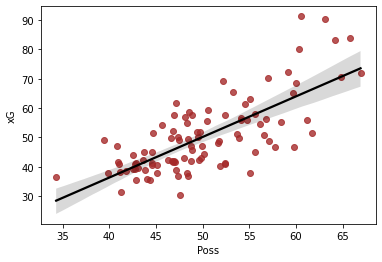

In [16]:
a = sns.regplot(data=laliga_df, x = "Poss", y = "xG", scatter_kws={"color": "brown"}, line_kws={"color": "black"})
plt.show()

#### Interpretación

**Pearson Correlation**: Hay una correlación positiva de 0.73506 (considerada como fuerte) entre los números de posesión (%) promedio por equipo y el total de xG durante la temporada. Usando el mismo criterio de la relación entre Dribbling y xG, esta correlación no posiciona a los niveles de posesión de balón como causa del incremento del xG, simplemente es un indicativo de que los equipos con mayor posesiones de balón tienden a tener mejores oportunidades de gol. 

Esto tampoco está relacionado directamente con el futbol posicional, sino más con los equipos ofensivos. Los equipos dominadores suelen iniciar su bloque defensivo alto con el uso de presión alta o media-alta, lo que minimiza el tiempo total de posesión del rival y maximiza el tiempo de la suya. Es por eso que equipos ofensivos pero verticales entran en el rango de este criterio, y no necesariamente gozan de altos niveles de posesiones largas como equipos que practican el futbol posicional, como el caso del FC Barcelona. 

## Modelo de Regresión Multivariable (Possession y Dribbling) y ejercicio de predicción xG de un equipo en base a variables.

In [17]:
# load dataset again / importar el set de datos
laliga_df = pd.read_csv("LaLigaDataset_U.csv") 
laliga_df.head()
laliga_df.columns

#define x and y / definir las variables x (variables independientes) e y (variable dependiente / target variable)
x = laliga_df.drop(['League', 'Season', 'Team', 'xG', 'xGA', 'xPTS', 'Press', 'Press_Succ',
       'Press%', 'P_Def_3rd', 'P_Mid_3rd', 'P_Att_3rd', 'Touches',
       'T_Def_3rd', 'T_Mid_3rd', 'T_Att_3rd', 'T_Att_Pen', 'Drib_Succ', 'DribSucc%', '#Players_Dribbled', 'Megs', 'Pass_Cmp',
       'Pass_Att', 'Pass_Cmp%', 'Pass_TotDist', 'Pass_PrgDist'], axis=1).values
y = laliga_df["xG"].values

In [18]:
#split the dataset in training and test sets / dividir el dataset en data de entrenamiento y testeo
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

# train the model / entrenar y configurar el modelo
from sklearn.linear_model import LinearRegression
ml = LinearRegression()
ml.fit(x_train, y_train)

# predict the test results / predecir los resultados del modelo
y_pred = ml.predict(x_test)
print(y_pred)

[46.58100961 49.08394033 48.52623649 54.19233131 57.63624289 45.26938491
 54.41012859 64.32816397 65.97306366 60.66656009 44.28050754 44.30871935
 43.88838844 50.16545241 46.6353277  38.59588578 51.53897454 51.70129598
 36.5068644  35.17692273 74.4917856  53.98958771 65.42641242 41.18166135
 50.77326327 37.14951863 46.5874312  44.71189105 50.47472666 55.22478913]


In [19]:
# Evaluate the model / Evaluamos el modelo
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

#create dataframe with test and prediction values / crear un dataframe con la diferencia entre el valor predecido y el actual
pred_df = pd.DataFrame({"Actual Value":y_test, "Predicted Value":y_pred, "Difference":y_test-y_pred})
r2_score(y_test,y_pred)

0.521686532350337

In [30]:
# make a prediction with our input / Predecir en base a nuestro criterio (input)

print("En base a los inputs, el modelo predice una puntuación xG final de:", ml.predict([[laliga_df["Poss"].mean(), laliga_df["Drib_Att"].mean()]]))

En base a los inputs, el modelo predice una puntuación xG final de: [50.03636468]


#### Interpretación del modelo

- El modelo va a hacer una predicción en base a nuestros inputs (Niveles de posesión y Dribbles efectuados por temporada). En esta ocasión hemos utilizado los niveles de posesión y dribbles efectuados promedio, y básicamente el modelo nos está diciendo que de tener una posesión total del 50.043% a final de temporada y unos 609 dribles intentados por temporada, te garantiza un total xG de 50 goles por temporada. Estos modelos pueden ser de mucho uso en la búsqueda de optimización y de finalmente eficiencia en cuanto resultados, ya que sabemos que el xG está fuertemente correlacionado con los puntos totales y sobretodo con los Expected Points, y un incremento en estas puntuaciones son sinónimo de estar haciendo las cosas bien.

- **Coeficiente de determinación**: el coeficiente de determinación en este caso es de 0.5212, lo cual dada la disponibilidad de data es una puntuación aceptable. De todas maneras, el objetivo de está regresión multi-variable es experimentar las capacidad predictivas que el machine learning ofrece y cómo puede ser usado en el fútbol. Por ejemplo, dentro de un análisis multivariable más extenso, estos modelos pueden ayudar desde distintas perspectivas:

**Dirección deportiva & Divisiones menores:**

- Determinar qué tipo de jugadores necesitan, tanto si se alinean con el proyecto deportivo o para reforzar áreas que Analytics confirma tienen probabilidad alta de ser un éxito en base a la estadística. Por ejemplo, un estudio estadístico determina que una buena optimización (Prescriptive Analytics) de dos extremos en un sistema 4-3-3 consistiera en tener un extremo con ciertas características especificas (por ejemplo: Dribbleador, Pase final, etc) y el otro con otras (ejemplo: Constante desmarque de ruptura, pegada, etc). 
- Lograr optimización en cuanto a refuerzos en base a necesidades y presupuesto.
- Determinar talento emergente así como monitorear el progreso general de los futbolistas más jóvenes.
- Entendiendo desde un punto de vista estadístico las habilidades y fortalezas de los jugadores.
- Iniciativa: Es más complicado recopilar data en torneos de menores, ya que no se encuentra la infraestructura necesaria para llevarse a cabo. Sin embargo, puede ser una iniciativa importante el tratar de implementar estos sistemas de recopilación de datos en torneo de menores o reservas en el Perú, supondría una gran ventaja para el desarollo de nuestro fútbol.

**Entrenadores y cuerpo técnico:**

- Identificar qué jugadores están teniendo un rendimiento sobresaliente, sobretodo en aspectos dificiles de cuantificar con el ojo humano. Por ejemplo: la intensidad en la presión alta, sus puntajes xT, xA, xG, etc.
- En el desarrollo de estrategias y modelos de juego. 

**Agencias de Representación & Captación de talento:**
- Identificar talento emergente de una manera menos convencional. Con esto no se busca eliminar la figura del scout tradicional, simplemente es un complemento que serviría para optimizar la búsqueda de talento.
- Monitorear el progreso general de los futbolistas.
- Importante desde un punto de vista de negociación. Por ejemplo, Kevin de Bruyne no tiene representante y contrató a una empresa de Analytics británica (Analytics FC) para que determinara por medio de modelos estadísticos su impacto en los resultados de su equipo (Manchester City), y dejó que la data y estadística se encargarán de ello.
- Identificar el equipo y contexto ideal de acuerdo a las características de uno de los representados (De tener ofertas de varios equipos).

**ETC**
